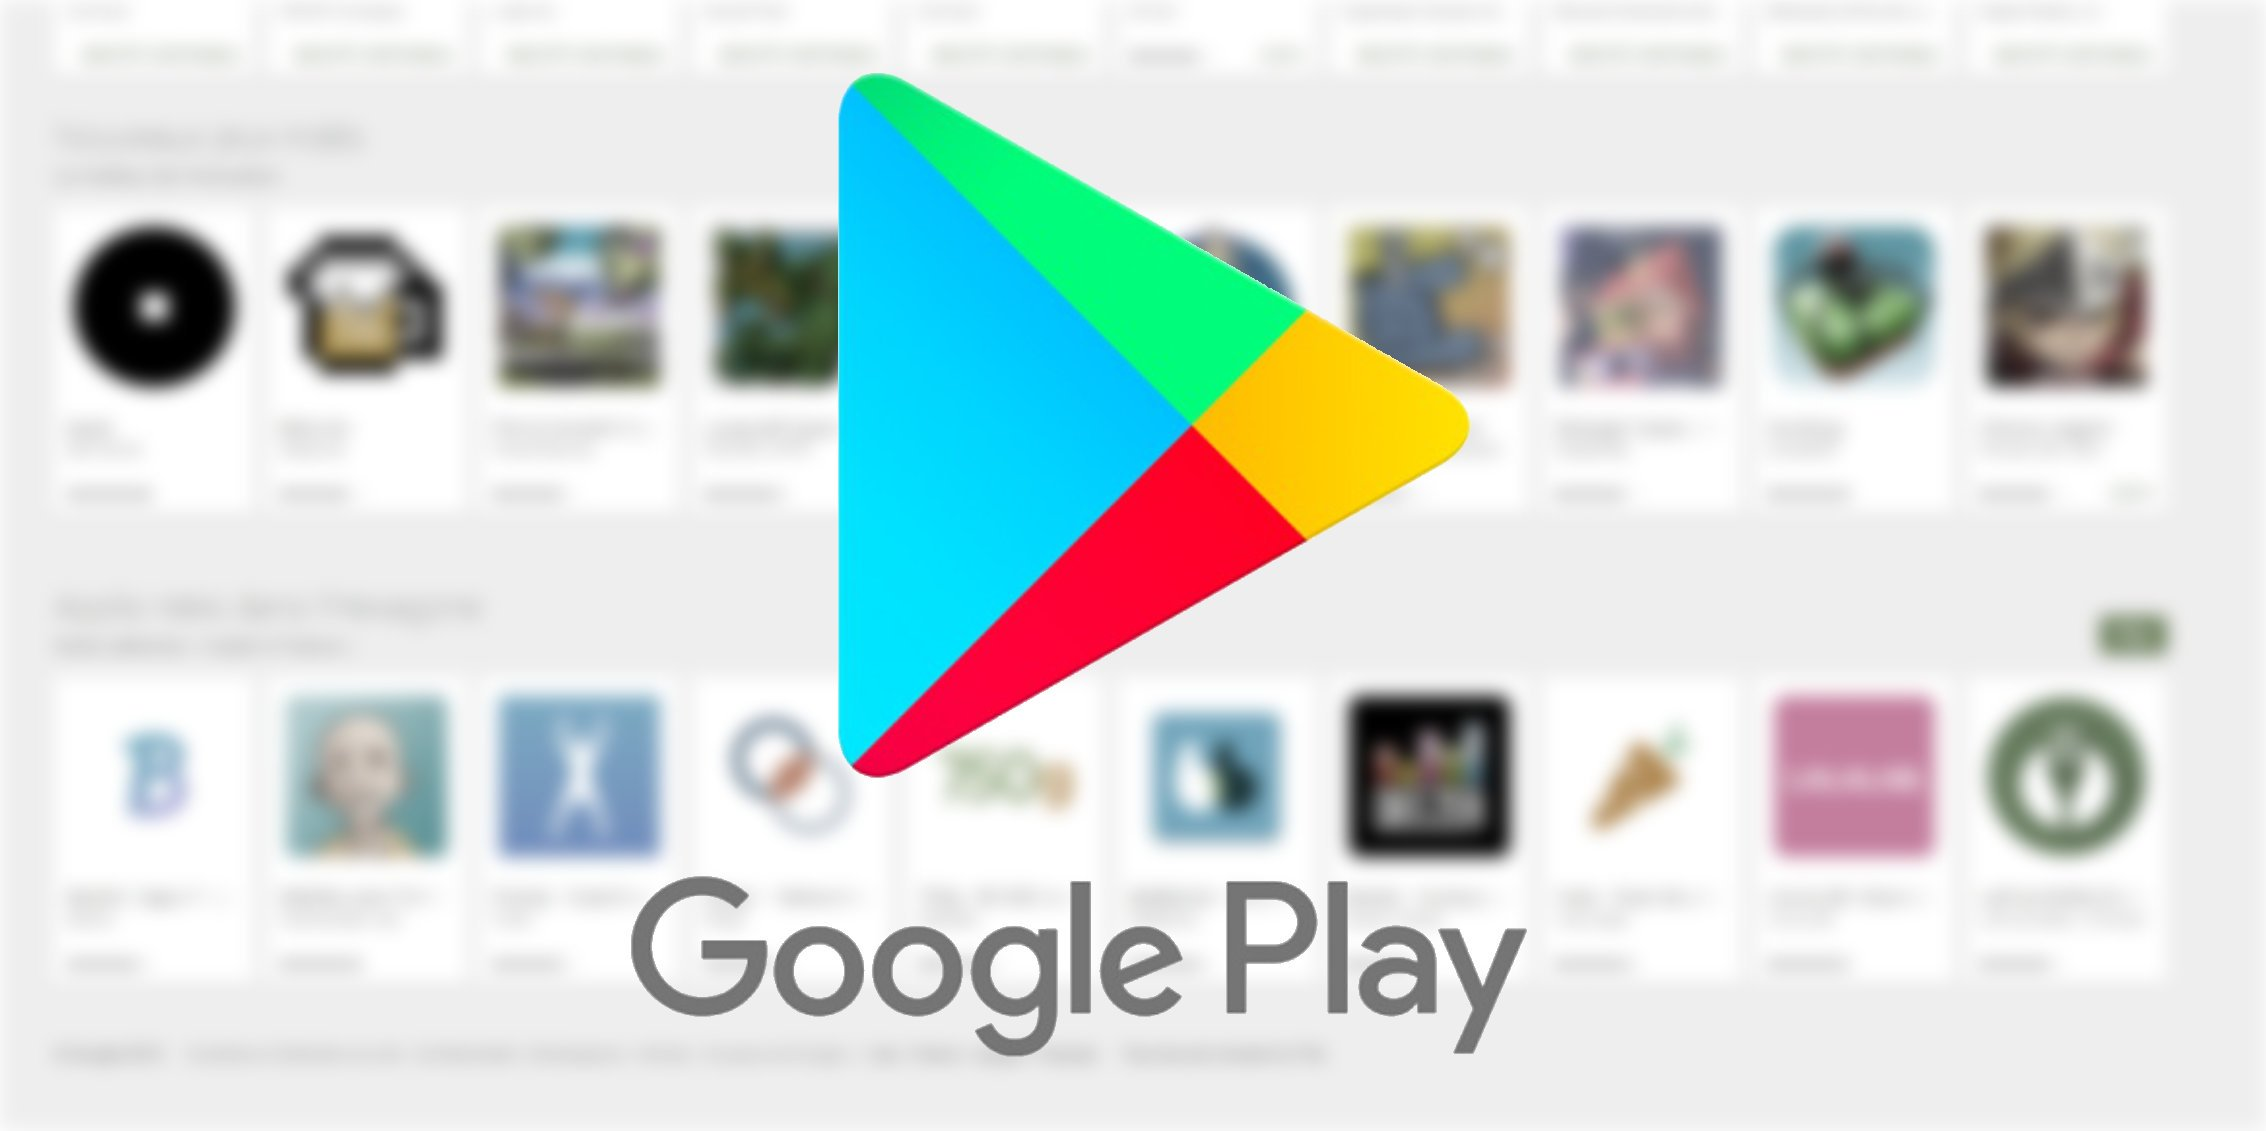



# **INTRODUCTION**

---

Dans ce deuxième notebook, nous avons créé un modèle qui prédit:
 
1. Les rating/notes obtenues par les applications du PlayStore, 
2. La polarité (positive/négative) d'un commentaire,
3. Les catégories d'une application seulement avec son nom.


DataSet trouvé sur Kaggle [ *(plus de détails ici)*](https://www.kaggle.com/lava18/google-play-store-apps). À travers ce notebook vous pourrez voir le cheminement de notre analyse ainsi que son aboutissement : les solutions. 

# **PRESENTATION DES DONNEES**

---

## **Import**

Tout d'abord, on importe :
- les librairies pandas et numpy (permettant d'explorer et de manipuler les datas), 
- les librairies matplotlib, plotly et seaborn (afin de réaliser des beaux graphiques),
- la librairie string (pour manipuler des chaines de caractères),
- la librairie google.colab,
- la librairie WordCloud (afin de créer des nuages de tags).

Puis on charge nos datas.

In [ ]:
# Les librairies utilisées:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import string
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor ,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
from wordcloud import WordCloud, ImageColorGenerator
from IPython.display import Image
from collections import Counter

# Ajout du drive pour avoir accès aux data, ...
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/kaggle/playstore/googleplaystore.csv")
data_reviews = pd.read_csv("/content/drive/My Drive/kaggle/playstore/googleplaystore_user_reviews.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g43lTAVTwlbA-ogxc26So8aM9WaW3DghN1j-7a3DtcJtVgOLIssuxQ
Mounted at /content/drive


## **Présentation des caratéristiques des deux data**

### data

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB




---


*On peut donc dire qu'il y 13 categories pour definir une app.*



---


 0.   App : Le nom de l'application
 1.   Category : La caregorie de l'application
 2.   Rating : La note de l'application
 3.   Reviews : Le nombre de commentaires de l'application
 4.   Size : La taille  de l'application
 5.   Installs :  Le nombre d'installations
 6.   Type : Gratuit/payant
 7.   Price : Le prix
 8.  Content Rating : Le groupe d'age ciblé par l'application
 9.   Genres : Le genre de l'application (plus précis que catégorie)
 10.  Last Updated : dernière maj
 11.  Current Ver : version actuelle
 12.  Android Ver : version d'android minimum requise
---
 *Il y'a 10841 données mais il en manque dans certaines catégories (Rating,Content Rating, Current Ver, Android Ver), il y'en a 9367 exploitable. On doit donc trier la data avant de l'utiliser.*


---



### data review

In [ ]:
data_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB




---
*On peut donc dire qu'il y 5 categories pour definir un commentaire d'une application.*


---


 0.   App : Le nom de l'application
 1.   Translated_Review : Le commentaire
 2.   Sentiment : S'il parait positif, négatif ou neutre
 3.   Sentiment_Polarity : Son score de polarité (entre -1 et 1 où -1=négatif et 1=positif)
 4.   Sentiment_Subjectivity : Son score de la subjectivité du sentiment

---
 *Il y'a 64295 données mais il en manque dans certaines catégories, il y'en a 37427 exploitable. On doit donc trier la data avant de l'utiliser.*


---




### Stats rapide

In [ ]:
data.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

On constate que seulement la donnée Rating est de type numérique.

In [ ]:
data_reviews.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

Ici on constate que seulement les données Sentiment_Polarity et Sentiment_Subjectivity sont de type numérique.

# **TRI DATA**

On va ici passer les données intéressantes en valeurs numériques afin qu'elles deviennent exploitables.
On fait donc une copie de data dans data_light.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
data_light = data.copy()
data_light.dropna()

data_install = []

data_light.shape

(10841, 13)

In [ ]:
data_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Type

In [ ]:
data_light['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

La donnée type est de type Object, on va remplacer les valeurs 'Free' par 1 et sinon par 0.

In [ ]:
data_type = []

for i in range(10841):
  if (data_light.Type[i]=='Free'):
    data_type.append(1)
  else: 
    data_type.append(0)

data_light['Free'] = data_type

## Size

In [ ]:
data_light['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

La donnée Size est de type Object, on va modifier ses valeurs de la sorte : '10k' => 10000.

In [ ]:
unite = ['Varies with device', 'M','+', 'k']
for i in range(10841):
      nvUni = data_light.Size[i][-1]
      if (((nvUni in unite)==0) and (data_light.Size[i] != 'Varies with device')):
        unite.append(data_light.Size[i])
      
print(unite)

['Varies with device', 'M', '+', 'k']


In [ ]:
data_size = []

for i in range(10841):
    if (data_light.Size[i]=='Varies with devices'):
      data_size.append('NaN')

    elif (data_light.Size[i][-1]=='k'):
      taille = len(data_light.Size[i])
      Str_valeur = data_light.Size[i][0:taille-1]
      valeur = float(Str_valeur)
      valeur = valeur*1000
      data_size.append(valeur)

    elif (data_light.Size[i][-1]=='M'):
      taille = len(data_light.Size[i])
      Str_valeur = data_light.Size[i][0:taille-1]
      valeur = float(Str_valeur)
      valeur = valeur*1000000
      data_size.append(valeur)

    else:
      taille = len(data_light.Size[i])
      data_light.Size[i][0:taille-1]
      data_size.append(float(Str_valeur))

data_light['Size'] = data_size

In [ ]:
data_light

App  ... Free
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...    1
1                                    Coloring book moana  ...    1
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...    1
3                                  Sketch - Draw & Paint  ...    1
4                  Pixel Draw - Number Art Coloring Book  ...    1
...                                                  ...  ...  ...
10836                                   Sya9a Maroc - FR  ...    1
10837                   Fr. Mike Schmitz Audio Teachings  ...    1
10838                             Parkinson Exercices FR  ...    1
10839                      The SCP Foundation DB fr nn5n  ...    1
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...    1

[10841 rows x 14 columns]

## Installs

In [ ]:
data_light['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

La donnée Installs est de type Object, on va donc la convertir en réel ("float") après avoir supprimé les ',' et les '+'. On va la modifier de la sorte : '5,000+' => 5000.

In [ ]:
# On remplace ',' par '' pour pouvoir convertir plus simplement par la suite.
data_light['Installs'] = data_light['Installs'].replace(',','',regex=True)

# On supprime le '+' de chaque donnée ou on la remplace par 'NaN', puis on la convertie en float
for inst in range(10841):
  if (data_light.Installs[inst][-1] == '+'):
    taille = len(data_light.Installs[inst])
    str_valeur = data_light.Installs[inst][0:taille-1]
    data_light.Installs[inst] = str_valeur
  else:
    data_light.Installs[inst] = 'NaN'

data_light['Installs'] = data_light['Installs'].astype(float)
data_light.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rating          Size      Installs          Free
count  9367.000000  1.084100e+04  1.083900e+04  10841.000000
mean      4.193338  1.815042e+07  1.546577e+07      0.926022
std       0.537431  2.217026e+07  8.503315e+07      0.261748
min       1.000000  1.000000e+00  0.000000e+00      0.000000
25%       4.000000  2.600000e+06  3.000000e+03      1.000000
50%       4.300000  9.200000e+06  1.000000e+05      1.000000
75%       4.500000  2.600000e+07  5.000000e+06      1.000000
max      19.000000  1.000000e+08  1.000000e+09      1.000000

## Reviews

In [ ]:
data_light['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Cette donnée est de type Object, on va donc la convertir en entier ("int").

La commande de conversion nous renvoie une erreur expliquant qu'il y a une donnée "3.0M" (signifiant 3 Millions) donc impossible de la convertir en int.

Donc on détermine la position de cette ligne puis on la remplace.


In [ ]:
data_light[data_light['Reviews'].str.contains('M')]

App Category  ...  Android Ver Free
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...          NaN    0

[1 rows x 14 columns]

Le "M" est à la position 10472. On voit que pour cette ligne, toutes les données ont été décalées à partir de la catégorie. On va donc remplacer les données qui nous intéressent manuellement de la sorte : '3.0M' => 3000000.



In [ ]:
data_light['Category'].loc[10472] = "NaN"
data_light['Rating'].loc[10472] = 1.9
data_light['Reviews'].loc[10472] = 19
data_light['Size'].loc[10472] = 3000000
data_light['Installs'].loc[10472] = 404
data_light['Type'].loc[10472] = "NaN"
data_light['Price'].loc[10472] = 0
data_light['Reviews'] = data_light['Reviews'].astype(int)
data_light.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Rating       Reviews          Size      Installs          Free
count  9367.000000  1.084100e+04  1.084100e+04  1.084000e+04  10841.000000
mean      4.191513  4.441119e+05  1.815070e+07  1.546434e+07      0.926022
std       0.515735  2.927629e+06  2.217006e+07  8.502936e+07      0.261748
min       1.000000  0.000000e+00  1.000000e+00  0.000000e+00      0.000000
25%       4.000000  3.800000e+01  2.600000e+06  1.000000e+03      1.000000
50%       4.300000  2.094000e+03  9.200000e+06  1.000000e+05      1.000000
75%       4.500000  5.476800e+04  2.600000e+07  5.000000e+06      1.000000
max       5.000000  7.815831e+07  1.000000e+08  1.000000e+09      1.000000

On a maintenant les données Rating, Reviews, Size, Installs et Free exploitables car en valeurs numériques.

# **ANALYSE DATA**

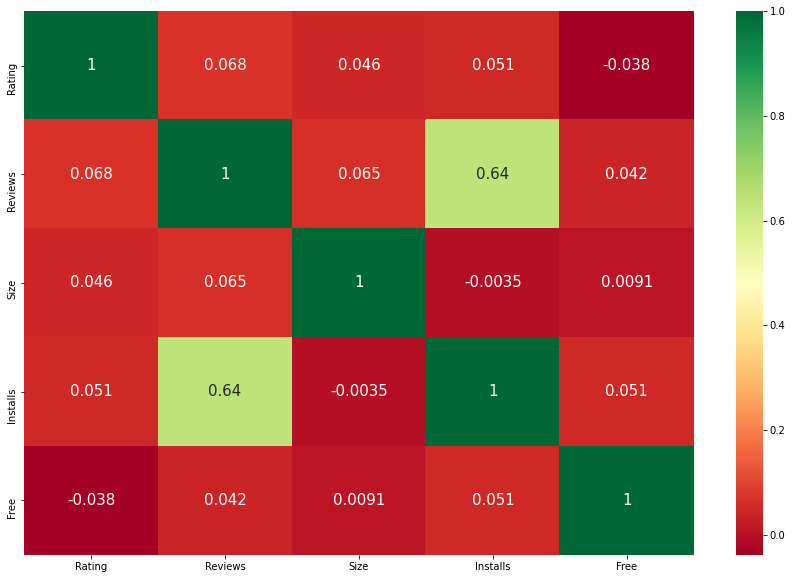

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_light.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## Reviews

On s'intéresse maintenant aux commentaires de chaque application.

In [ ]:
data_light[data_light.Reviews > 5000000].describe()

Rating       Reviews          Size      Installs   Free
count  230.000000  2.300000e+02  2.300000e+02  2.300000e+02  230.0
mean     4.436522  1.368023e+07  3.040002e+07  3.297826e+08    1.0
std      0.158227  1.457751e+07  3.726226e+07  3.347977e+08    0.0
min      3.800000  5.091448e+06  1.500000e+00  5.000000e+07    1.0
25%      4.400000  6.198642e+06  1.800000e+01  1.000000e+08    1.0
50%      4.500000  8.154614e+06  9.800000e+01  1.000000e+08    1.0
75%      4.500000  1.282210e+07  6.300000e+07  5.000000e+08    1.0
max      4.700000  7.815831e+07  1.000000e+08  1.000000e+09    1.0

On constate ici qu'il y a 230 applications de plus de 5M de commentaires, avec une moyenne de 13.6M de commentaires.

In [ ]:
data_light[data_light.Reviews <= 5000000].describe()

Rating       Reviews          Size      Installs          Free
count  9137.000000  1.061100e+04  1.061100e+04  1.061000e+04  10611.000000
mean      4.185345  1.572109e+05  1.788519e+07  8.650654e+06      0.924418
std       0.520098  5.386233e+05  2.165352e+07  5.271562e+07      0.264340
min       1.000000  0.000000e+00  1.000000e+00  0.000000e+00      0.000000
25%       4.000000  3.400000e+01  2.700000e+06  1.000000e+03      1.000000
50%       4.300000  1.802000e+03  9.200000e+06  1.000000e+05      1.000000
75%       4.500000  4.508250e+04  2.500000e+07  1.000000e+06      1.000000
max       5.000000  4.972230e+06  1.000000e+08  1.000000e+09      1.000000

On constate ici qu'il y a 10611 applications de moins de 5M de commentaires, avec une moyenne de 157.5k commentaires.

### Diagramme

On regarde de plus la distribution des reviews grâce à un KDE plot.

Text(0.5, 1.0, 'Distribution des commentaires')

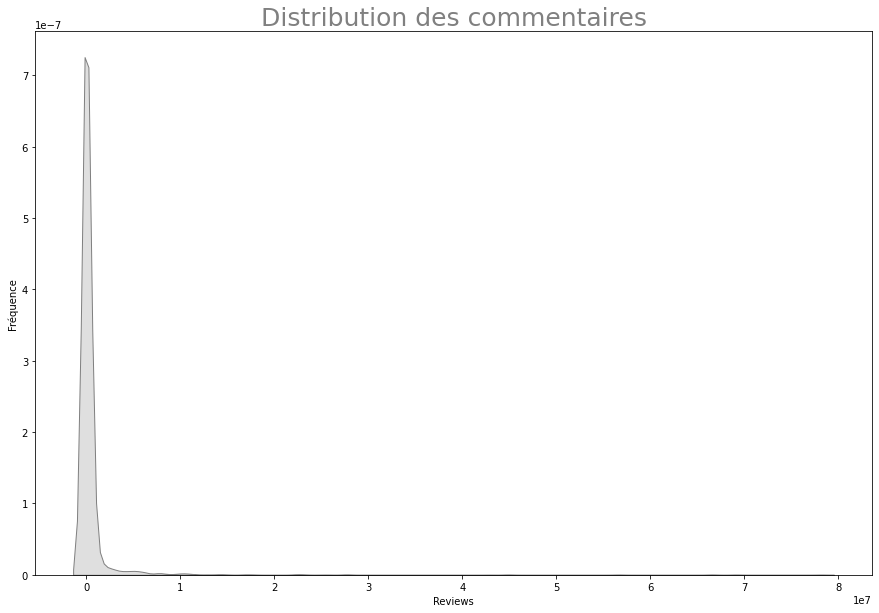

In [ ]:
plt.figure(figsize=(15, 10))
kde = sns.kdeplot(data_light.Reviews, color="grey", shade = True)
kde.set_xlabel("Reviews")
kde.set_ylabel("Fréquence")
plt.title('Distribution des commentaires',size = 25, color='grey')

Ce graphe illustre les résultats trouvés ci-dessus, c'est-à-dire qu'il y a énormément d'applications qui ont peu de commentaires.

## Installs et Reviews

On constate que les 2 variables les plus corrélées sont Installs et Reviews à hauteur de 0.64.

Cela s'expliquerait par le fait que plus il y a d'installations, plus il y a d'utilisateurs qui ont essayé l'application et qui laissent un commentaire. 
Egalement, cela signifierait que les utilisateurs ont tendance à télécharger des applications avec beaucoup de commentaires.

### Diagramme

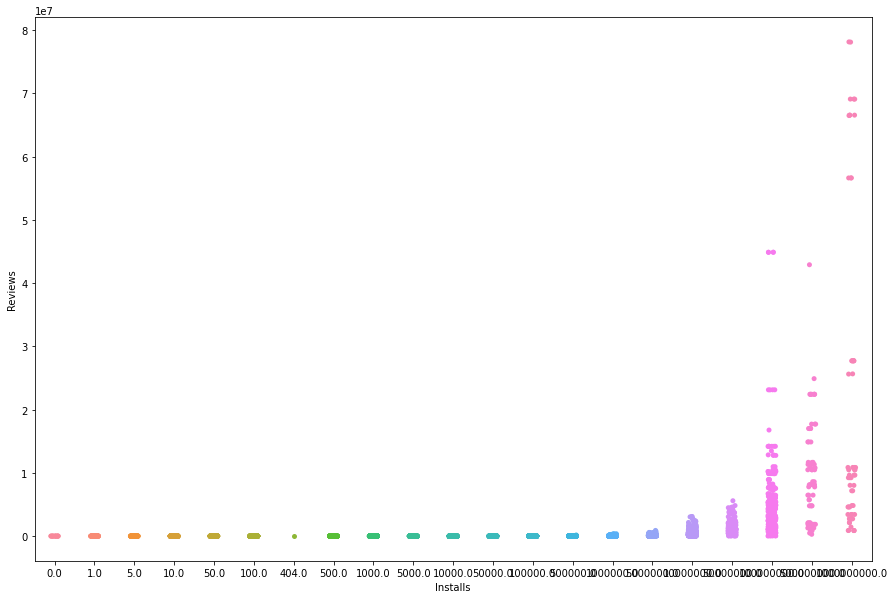

In [ ]:
plt.figure(figsize=(15, 10))
sns.stripplot(x=data_light['Installs'], y=data_light['Reviews'])

On constate donc que l'hypothèse est vérifiée : Plus une application a d'installations, plus elle a de commentaires.

Donc avoir beaucoup de commentaires sur une application peut faire augmenter le nombre d'installations.

## Reviews et Rating

On analysera ici la note de l'application en fonction du nombre de commentaires.

In [ ]:
data_light['Rating'].describe()

count    9367.000000
mean        4.191513
std         0.515735
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Pour la donnée Rating, les notes vont de 1 à 5 avec une moyenne de 4.19.

### Diagramme

In [ ]:
fig = px.bar(data_light, x='Rating', y='Reviews', title="Nombre de Reviews en fonction de la note Rating")
fig.show()

Il semblerait qu'une application avec beaucoup de commentaires ait une bonne note (environ 4.5).

## Installs et Rating

On va regarder ici si le nombre d'installations a un lien avec la note de l'application.

### Diagramme

In [ ]:
fig = px.bar(data_light, x='Rating', y='Installs', title="Nombre d'Installs en fonction de la note Rating")
fig.show()

Comme précédemment, les applications beaucoup installées et donc connues sont celles avec une bonne note (environ 4.3).

## Category

C'est ensuite les catégories qui nous intéressent, c'est-à-dire lesquelles sont les plus fréquentes.

### Analyse/Tri

In [ ]:
#g = sns.countplot(x="Category",data=data_light, palette = "Set1")
#g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
#plt.title('Count of app in each category',size = 20)

In [ ]:
data_light.Category

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

D'abord, on crée une liste contenant chaque catégorie une seule fois.

In [ ]:
category=[]
for cat in data_light.Category:
  if cat not in category:
    category.append(cat)
del category[-1]
print(category)

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


Puis pour chaque catégorie, on crée une nouvelle liste avec son nombre d'applications.

In [ ]:
means=[]
nbrCat=[]
CatAllRating=[]

def Cat(catego):
  CatAllRating.append([])
  nb=0
  rate=0 
  for j in range(10841):
    if ((catego == data_light.Category[j]) and (np.isnan(data_light.Rating[j]) == False)):
      CatAllRating[-1].append(data_light.Rating[j])
      nb = nb+1
      rate = rate + data_light.Rating[j]
  means.append(rate/nb)
  nbrCat.append(nb)

In [ ]:
for i in category:
  A=Cat(i)

In [ ]:
nbrCatIn=[]

def CatIns(catego):
  nb=0
  a=0 
  for j in range(10841):
    if ((catego == data_light.Category[j]) and (np.isnan(data_light.Installs[j]) == False)):
      nb = nb + data_light.Installs[j]
      a=a+1
  nbrCatIn.append(nb/a)

In [ ]:
for i in category:
  A=CatIns(i)

### Diagramme

In [ ]:
fig = px.bar(x=category, y=nbrCatIn, hover_data=[means], color=means)
fig.update_layout(title="Nombre d'installations par catégorie", xaxis_title="Catégories", yaxis_title="Nombre d'Installs")
fig.show()

Les applications de la catégorie 'Communication' sont les plus installées.

In [ ]:
fig = px.bar(x=category, y=nbrCat, hover_data=[means], color=means)
fig.update_layout(title="Nombre d'applications par catégorie", xaxis_title="Catégories", yaxis_title="Nombre d'applications")
fig.show()

Les catégories 'Family' et 'Game' sont les plus fréquentes sur Playstore.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=CatAllRating[6], name='COMMUNICATION'))
fig.add_trace(go.Box(y=CatAllRating[17], name='GAME'))
fig.add_trace(go.Box(y=CatAllRating[20], name='SOCIAL'))
fig.add_trace(go.Box(y=CatAllRating[22], name='PHOTOGRAPHY'))
fig.add_trace(go.Box(y=CatAllRating[24], name='TRAVEL_AND_LOCAL'))
fig.add_trace(go.Box(y=CatAllRating[27], name='PRODUCTIVITY'))
fig.add_trace(go.Box(y=CatAllRating[30], name='VIDEO_PLAYERS'))
fig.add_trace(go.Box(y=CatAllRating[31], name='NEWS_AND_MAGAZINES'))


fig.update_layout(
    title='La répartitions des rating des 8 catégories les plus fréquentes',
    yaxis_title='difference de Rating',
    xaxis_title='Category',
      paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',

)


fig.show()

## Genre

### Analyse/Tri

In [ ]:
data_light.Genres

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10836                    Education
10837                    Education
10838                      Medical
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 10841, dtype: object

In [ ]:
Genres = []
for i in range(10840):
      if (((data_light.Genres[i] in Genres)==0) and (data_light.Genres[i]!='February 11, 2018')):
        Genres.append(data_light.Genres[i])

In [ ]:
print(Genres)

['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Comics;Creativity', 'Communication', 'Dating', 'Education;Education', 'Education', 'Education;Creativity', 'Education;Music & Video', 'Education;Action & Adventure', 'Education;Pretend Play', 'Education;Brain Games', 'Entertainment', 'Entertainment;Music & Video', 'Entertainment;Brain Games', 'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card', 'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Casual;Creativity', 'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing', 'Simulation;Education', 'Action;Action & Adventure', 'Casual;Brain Games', 'Simulation;Action & Adven

In [ ]:
means2=[]
nbrGenres=[]
toDel=[]

def Gen(Genres):
  nb=0
  rate=0 
  for j in range(10840):
    if ((Genres == data_light.Genres[j]) and (np.isnan(data_light.Rating[j]) == False)):
      nb = nb+1
      rate = rate + data_light.Rating[j]
  if (nb>0):
    means2.append(rate/nb)
    nbrGenres.append(nb)
  else:
      toDel.append(Genres)

In [ ]:
for i in Genres:
  Gen(i)

In [ ]:
for i in toDel:
  del Genres[Genres.index(i)]

### Diagramme

In [ ]:
fig = px.bar(x=Genres, y=nbrGenres, hover_data=[means2], color=means2)
fig.update_layout(title="Nombre d'applications par genre", xaxis_title="Genres", yaxis_title="Nombre d'applications")
fig.show()

Les genres les plus fréquents sont 'Tools' (outils), 'Entertainment' (divertissement) et 'Education'.

## Size

### Analyse/Tri

On s'intéresse ensuite à la taille des applications.

In [ ]:
data_light.Size

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           9.5
10840    19000000.0
Name: Size, Length: 10841, dtype: float64

In [ ]:
size = []
for i in range(10841):
      if ((data_light.Size[i] in size)==0):
        size.append(data_light.Size[i])
len(size)

655

In [ ]:
means3=[]
nbrSize=[]

def Siz(size):
  nb=0
  rate=0 
  for j in range(10841):
    if (size == data_light.Size[j]):
      nb = nb+1
      rate = rate + data_light.Rating[j]
  means3.append(rate/nb)
  nbrSize.append(nb)

for i in size:
  Siz(i)

### Diagramme

In [ ]:
fig = px.histogram(data_light, x="Size",
                   title='Histogram of Size',
                   log_y=True)
fig.update_layout(title="Nombre d'applications par rapport à leur taille", xaxis_title="Size", yaxis_title="Nombre d'applications")

fig.show()

In [ ]:
fig = px.scatter(x=size, y=means3)
fig.show()

En effet, il y a plus d'applications de taille faible (<40M).

## Free

### Analyse/Tri

On regarde maintenant s'il y a plus d'applications gratuites ou payantes.

In [ ]:
nbrf=0
ratef=0 
nbr=0
rate=0 
FreeAllRating=[]
NotFreeAllRating=[]

for i in range(10841):
  if (data_light.Free[i]==1 and (np.isnan(data_light.Rating[i]) == False) and (data_light.Rating[i]<6)):
    FreeAllRating.append(data_light.Rating[i])
    nbrf=nbrf+1
    ratef=ratef+data_light.Rating[i]
  elif ((np.isnan(data_light.Rating[i]) == False)  and data_light.Rating[i]<6 ):
    NotFreeAllRating.append(data_light.Rating[i])
    nbr=nbr+1
    rate = rate+data_light.Rating[i]

rate=rate/nbr
ratef=ratef/nbrf

In [ ]:
means4=[ratef, rate]

### Diagramme

In [ ]:
fig = px.bar(x=['free','not free'], y=[nbrf, nbr],
             hover_data=[means4], color=means4)
fig.show()

Ce graphique nous montre que les applications sont majoritairement gratuites sur Playstore.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=FreeAllRating, name = 'Free', marker_color='#FF4136'))
fig.add_trace(go.Box(y=NotFreeAllRating, name = 'Not Free', marker_color='royalblue'))
fig.update_layout(
    title='La répartitions des rating Free/Not Free',
    yaxis_title='difference de Rating'

)

## **Linear regression**

In [ ]:
# tri data
data_reg = data_light.copy()
data_reg.Category[10472]= data_reg.Category[1]

for i in range(10840):
  if ((np.isnan(data_reg.Rating[i]) == True) or (np.isnan(data_reg.Installs[i]) == True)
   or (np.isnan(data_reg.Size[i]) == True) or (np.isnan(data_reg.Reviews[i] == True))):
    data_reg.drop(i,0,inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cat2=[]

for i in data_reg.Category:
  for j in category:
    if (i == j):
      cat2.append(category.index(j))

In [ ]:
data_reg['IndexCat'] = cat2

On essaye de prédire Rating avec Installs.

Mean squared error:  0.2707011878223813
Coefficient of determination: 0.0033790247490301795


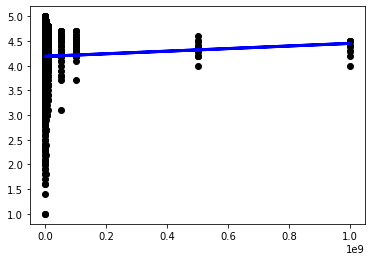

In [ ]:
Y = data_reg.Rating
X = data_reg.drop(columns=['Rating', 'Genres', 'App', 'Category', 'Price',
                           'Android Ver', 'Last Updated', 'Current Ver', 'Content Rating', 'Type','Free', 'IndexCat', 'Size','Reviews'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
predictX = reg.predict(x_test)

mse = mean_squared_error(y_test, predictX)
r2 = r2_score(y_test,predictX)

print('Mean squared error: ', mse)
print('Coefficient of determination:', r2)

plt.scatter(x_test.Installs, y_test,  color='black')
plt.plot(x_test.Installs, predictX, color='blue', linewidth=3)


plt.show()

## **Random forest**

On essaye de prédire Rating avec Installs, Reviews, Size, IndexCat (les catégorie) et enfin Free.

In [ ]:
clf = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)

YForest = data_reg.Rating
XForest = data_reg.drop(columns=['Rating', 'Genres', 'App', 'Category', 'Price',
                           'Android Ver', 'Last Updated', 'Current Ver', 'Content Rating', 'Type'])
clf = clf.fit(XForest,YForest)
pd.DataFrame([clf.feature_importances_],columns=XForest.columns )

Reviews      Size  Installs      Free  IndexCat
0  0.519224  0.017318  0.378279  0.018829  0.066349

In [ ]:
clf.score(XForest,YForest)

0.13222025695568662

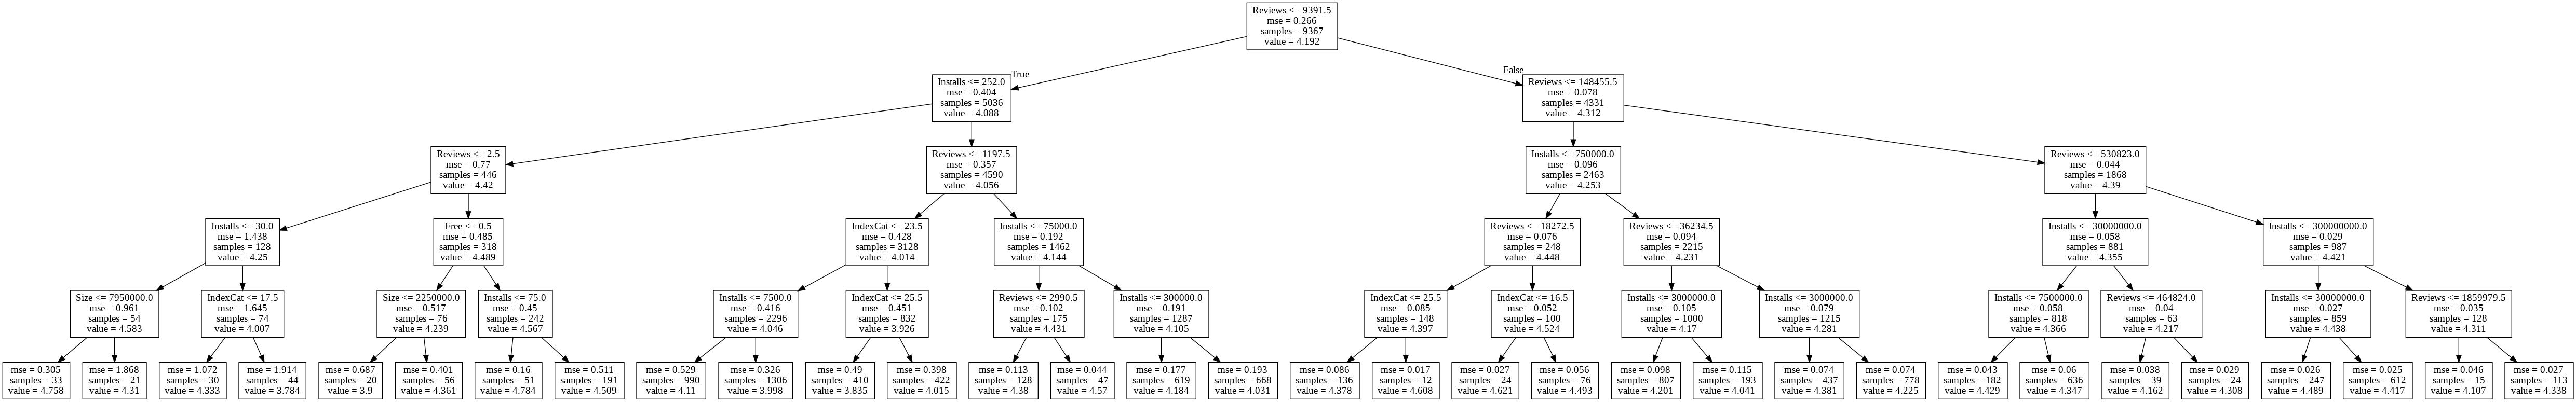

In [ ]:
export_graphviz(clf, out_file='treeGooglePlayStore.dot',feature_names = XForest.columns.tolist(),)
!dot -Tpng treeGooglePlayStore.dot -o treeGooglePlayStore.png
Image(filename = 'treeGooglePlayStore.png')

## Conclusion

D'après l'analyse des données ci-dessus, on constate que :

*   Plus une application a de commentaires, plus elle est installée,
*   Une application avec beaucoup de commentaires ou beaucoup d'installations a une bonne note (environ 4.5),
*   Les catégories les plus fréquentes sur Playstore sont 'Family' et 'Game',
*   Mais celles avec le plus d'installations sont 'Communication' et 'Social'.
*   Les genres les plus fréquents sont 'Tools', 'Entertainment' et 'Education',
*   La taille des applications est généralement faible (< 40M),
*   Les applications sont gratuites en général.

# **REVIEWS**

Dans cette partie, nous allons nous intéresser à la positivité ou non des commentaires.

## Imports


D'abord, on charge un fichier contenant des mots avec leur vecteur associé.

In [ ]:
embedding_dict={}
with open('/content/drive/My Drive/kaggle/playstore/Dictionnaire_mot&Vecteur.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
len(embedding_dict)

400000

Ce fichier contient 400000 mots.

Puis on charge un fichier contenant une liste de mots negatifs, puis un fichier contenant une liste de mots positifs trouver sur la plateforme KAGGLE.

In [ ]:
List_Negative_Words=[]
with open('/content/drive/My Drive/kaggle/playstore/negative-words.txt','r') as f:
    for line in f:
      # word=line.split()
      line = line[:-1]
      for word in embedding_dict:
        if (line==word):
          List_Negative_Words.append(line) #on vérifie que le mot negatif est bien parmi les mots de notre dictionnaire puis on l'ajoute à notre liste des mots negatifs
          # print(line)

f.close()

In [ ]:
List_Positive_Words=[]
with open('/content/drive/My Drive/kaggle/playstore/positive-words.txt','r') as f:
    for line in f:
      # word=line.split()
      line = line[:-1]
      for word in embedding_dict:
        if (line==word):
          List_Positive_Words.append(line) #on vérifie que le mot positif est bien parmi les mots de notre dictionnaire puis on l'ajoute à notre liste des mots positifs
          # print(line)
f.close()

print(List_Positive_Words)

['abound', 'abounds', 'abundance', 'abundant', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'agile', 'agility', 'agreeable', 'agreeableness', 'agreeably', 'all-around', 'alluring', 'alluringly', 'altruistic'

In [ ]:
data_reviews.head()

App  ... Sentiment_Subjectivity
0  10 Best Foods for You  ...               0.533333
1  10 Best Foods for You  ...               0.288462
2  10 Best Foods for You  ...                    NaN
3  10 Best Foods for You  ...               0.875000
4  10 Best Foods for You  ...               0.300000

[5 rows x 5 columns]

In [ ]:
len(data_reviews.Sentiment_Polarity)

64295

In [ ]:
data_reviews_light=data_reviews.copy()
data_reviews_light=data_reviews_light.drop(['App','Sentiment_Subjectivity','Sentiment'], axis=1)
data_reviews_light=data_reviews_light.dropna()

In [ ]:
data_reviews_light.head()

Translated_Review  Sentiment_Polarity
0  I like eat delicious food. That's I'm cooking ...                1.00
1    This help eating healthy exercise regular basis                0.25
3         Works great especially going grocery store                0.40
4                                       Best idea us                1.00
5                                           Best way                1.00

Les commentaires contenus dans la donnée 'Translated_Review' ne sont pas unifiés (ils ont de la ponctuation, des majuscules). On va les mettre en forme afin de les analyser facilement par la suite.

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
example="I am simon #des ...... foulard+"
example=remove_punct(example)
print(example)
example.split()

I am simon des  foulard


['I', 'am', 'simon', 'des', 'foulard']

On voit que la fonction remove_punct permet d'enlever la ponctuation d'une chaine de caractères.

In [ ]:
mot="Bonjour LES BarIsTa"
mot=mot.lower() #pour mettre en minuscule
print(mot)

bonjour les barista


In [ ]:
data_reviews_light['Translated_Review']=data_reviews_light['Translated_Review'].apply(lambda x : remove_punct(x))
#on enleve la ponctuation de tous les commentaires

In [ ]:
for comment in data_reviews_light['Translated_Review']:
  comment=comment.lower() #on met en minuscule
  print(comment.split())

Streaming output truncated to the last 5000 lines.
['great']
['great']
['this', 'is', 'great', '❤❤❤❤❤❤❤❤❤❤❤❤❤❤']
['still', 'change', 'used', 'favorite', 'lot', 'categories', 'update', 'example', 'food', 'maybe', '10', 'articles', 'recent', 'all', 'dates', 'come', 'december', '31st', '1969', 'same', 'website']
['some', 'quizzes', 'crashed', 'everytime', 'i', 'open', 'freeze', 'show', 'nothing', 'tried', 'updated', 'reinstalling', 'still', 'same', 'i', 'thought', 'connection', 'trouble', 'not', 'i', 'used', 'liked', 'buzzfeeds', 'quiz', 'content', 'couple', 'years', 'such', 'great', 'way', 'killing', 'time']
['its', 'good', 'crashes', 'time', 'annoying', 'wouldve', '5', 'stars', 'fixed']
['i', 'understand', 'exists', 'redundant', 'fails', 'load', 'content', 'post', 'comments', 'write', 'buzzfeed', 'okay', 'frustrating', 'poorly', 'designed']
['amazing', 'app', 'i', 'little', 'trouble', 'polls', 'phone', 'i', 'would', 'like', 'help', 'please', 'buzzfeed']
['this', 'amazing', 'it', 'favori

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
['good', 'innovative']
['its', 'best', 'one', 'thanks', 'its', 'amazing', 'online', 'business']
['google', 'map']
['very', 'good']
['excellent', 'types', 'business']
['worked']
['awsm', 'app']
['useful', 'business']
['tnx']
['eight']
['good']
['nice']
['very', 'important', 'business']
['very', 'good', 'apo']
['good']
['nice']
['when', 'i', 'try', 'change', 'cover', 'photo', 'ends', 'posting', 'new', 'post', 'so', 'damn', 'frustrating']
['i', 'cant', 'post', 'pics', 'videos', 'even', 'i', 'able', 'change', 'profile', 'pic', 'n', 'cover', 'photo', 'pls', 'fix', 'asap']
['thanks', 'disabling', 'business', 'page', 'reason', 'awful', 'model', 'thousands', 'pig', 'path', 'used', 'based', 'function', 'awful', 'if', 'put', 'effort', 'verified', 'would', 'kill', 'honour', 'side', 'deal']
['already', 'i', 'created', 'business', 'account', 'using', 'email', 'starting', 'getting', 'message', 'chose', 'google', 'account', 'manage', 'business']
['i'

Les commentaires sont maintenant unifiés et prêts à être analysés.

##Création de corpus

On crée un corpus pour dimunier le temps d'analyse des commentaires (les mots peuvent revenir plusieurs fois dans differents commentaire) : 

In [ ]:
corpus=[]# tous les mots
for comment in data_reviews_light['Translated_Review']:
  comment=comment.lower()
  comment=comment.split()
  for word in comment:
      # print(word)
      corpus.append(word)

In [ ]:
corpus_final=[] # mots dans le dictionnaire
for word in corpus:
  if (word in embedding_dict):
    corpus_final.append(word)

In [ ]:
mots_pas_dans_le_dictionnaire = []
for i in corpus : 
    if i not in embedding_dict: 
      mots_pas_dans_le_dictionnaire.append(i) 

In [ ]:
print(len(corpus)) # tous les mots de tous les commentaires
print(len(corpus_final)) # mots uniquement dans le dictionnaire
print(len(mots_pas_dans_le_dictionnaire)) # mots pas de le dictionnaire
print(len(mots_pas_dans_le_dictionnaire)+len(corpus_final)) # mots pas de le dict + mots dans le dict

682235
669229
13006
682235


In [ ]:
mots_pas_dans_le_dictionnaire

['kidneyliver',
 'developersto',
 'mysg5',
 'spartphones',
 '6pounds',
 'faltu',
 'predibetic',
 'downawesome',
 'appso',
 'kidneyliver',
 'developersto',
 'mysg5',
 'spartphones',
 '6pounds',
 'faltu',
 'predibetic',
 'downawesome',
 'appso',
 'awesomeee',
 'useutility',
 'uiux',
 'thanx',
 'userfriendly',
 '11st',
 '11sts',
 'makgeolli',
 'comskplanetsyruppaycardrecognizedlib',
 '10000000000000',
 'heloship',
 'repoint',
 'waaaaay',
 'fasteasy',
 'easy♥️',
 '1800contacts',
 'gs9',
 'waaaaay',
 'fasteasy',
 'easy♥️',
 '1800contacts',
 'gs9',
 'toooo',
 'unskippable',
 '❤❤❤❤❤❤❤❤❤❤❤❤',
 'tbh',
 'timewould',
 'emoji',
 'emojis',
 'bullsht',
 'enregistrate',
 'hahha',
 'bullsht',
 'emoji',
 'bugi',
 'emoji',
 'emoji',
 'emoji',
 '⭐⭐⭐⭐⭐',
 'ehh',
 'userfriendly',
 '21day',
 '5star',
 'itll',
 '3things',
 'therenow',
 'daywhat',
 'uninstal',
 'relisten',
 '21day',
 '21day',
 'deepaks',
 'voiceso',
 'apphands',
 'withthank',
 'highy',
 'meditationsstill',
 'quietthis',
 'userfriendly',
 '21d

In [ ]:
print(corpus_final[17000])

stopped


In [ ]:
# Sans les mots en doublons
corpus_set = [] 
for i in corpus_final : 
    if i not in corpus_set: 
        corpus_set.append(i) 

In [ ]:
print(len(corpus_set))

17415


##Fonctions sur les mots

In [ ]:
def is_in_positive_List(mot):
  for i in range (len(List_Positive_Words)):
     if (mot==List_Positive_Words[i]):
       return True
  return False

In [ ]:
def is_in_negative_List(mot):
  for i in range (len(List_Negative_Words)):
     if (mot==List_Negative_Words[i]):
       return True
  return False

In [ ]:
print(is_in_positive_List("great"))
print(is_in_positive_List("storm"))

print(is_in_negative_List("bad"))
print(is_in_negative_List("good"))

True
False
True
False


Vecteurs des mots :

In [ ]:
print(embedding_dict[List_Positive_Words[2]])

[-4.5233e-01  5.2751e-01  7.3868e-01  1.5545e-01 -2.3743e-01 -3.8078e-01
 -8.1186e-01  5.6340e-02 -4.6594e-01 -2.3452e-01 -6.0791e-01  1.2848e-01
  8.8493e-02 -5.3156e-01  3.6207e-01 -4.6797e-01 -4.8562e-02  2.5927e-01
 -1.3124e-01  3.6245e-01 -4.1970e-01  1.1485e-01 -1.0726e-01 -1.1621e-01
  3.2918e-01  6.0528e-01  4.9863e-01 -6.1456e-02 -7.1600e-01 -3.9398e-01
 -1.2088e-01 -4.7428e-01 -3.2745e-01  4.8528e-04  3.2447e-01 -2.2450e-02
  3.5431e-01  3.5650e-01 -2.3936e-01 -6.5994e-01  1.8976e-01 -1.6451e-01
 -4.7788e-01 -1.2073e-01  5.9554e-01 -4.2042e-01 -5.4063e-03  2.1056e-01
 -5.0805e-02 -1.6569e-01  3.1778e-01 -3.8782e-02  1.1279e-01  4.2791e-01
  3.9531e-01 -6.9410e-01 -1.1811e-01 -6.2810e-01  2.7714e-01 -4.4773e-01
 -5.6234e-01  2.7331e-01  7.8971e-02  5.9745e-03  1.2053e+00 -3.4645e-01
  6.8173e-01 -1.4753e+00  1.0289e+00 -2.1376e-01 -1.3246e-03  2.3337e-02
  6.1387e-01  5.4320e-02  4.2838e-01  5.4175e-01 -1.8819e-01 -8.8571e-01
 -2.5535e-01  3.5455e-01  3.8472e-02  4.4128e-02 -4

In [ ]:
embedding_dict["happy"]

array([-0.090436 ,  0.19636  ,  0.29474  , -0.47706  , -0.80436  ,
        0.3078   , -0.55205  ,  0.58453  , -0.17056  , -0.84846  ,
        0.19528  ,  0.23671  ,  0.46827  , -0.58977  , -0.12163  ,
       -0.24697  , -0.072944 ,  0.17259  , -0.0485   ,  0.9527   ,
        0.50629  ,  0.58497  , -0.19367  , -0.45459  , -0.031095 ,
        0.51633  , -0.24052  , -0.1007   ,  0.53627  ,  0.024225 ,
       -0.50162  ,  0.73692  ,  0.49468  , -0.34744  ,  0.89337  ,
        0.057439 , -0.19127  ,  0.39333  ,  0.21182  , -0.89837  ,
        0.078704 , -0.16344  ,  0.45261  , -0.41096  , -0.19499  ,
       -0.13489  , -0.016313 , -0.021849 ,  0.17136  , -1.2413   ,
        0.079503 , -0.91144  ,  0.35699  ,  0.36289  , -0.24934  ,
       -2.1196   ,  0.14534  ,  0.52964  ,  0.90134  ,  0.033603 ,
        0.022809 ,  0.70625  , -1.0362   , -0.59809  ,  0.70592  ,
       -0.072793 ,  0.67033  ,  0.52763  , -0.47807  , -0.67374  ,
        0.36632  , -0.38284  , -0.10349  , -0.6402   ,  0.1810

In [ ]:
embedding_dict["best"] - embedding_dict["best"]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Fonctions sur les vecteurs de mots :

In [ ]:
def similarite(mot1, mot2):
  ScoreS=100
  m=embedding_dict[mot1]-embedding_dict[mot2]
  for i in range(100):
    if (m[i]<0):
      m[i] = -m[i] #on convertit les vecteurs (float) negatifs en positifs.
    ScoreS=ScoreS-m[i] 

  # print("La différence des vecteurs : \n",m)
  # print("Taux de similarité en %: ",ScoreS)
  return ScoreS

In [ ]:
similarite("best","good")

70.38544163107872

In [ ]:
similarite("ketchup","good")

39.91801256686449

In [ ]:
similarite("storm","good")

45.845109801739454

In [ ]:
similarite("storm","bad")

52.51504706311971

In [ ]:
similarite("computer","science")

53.163571901619434

In [ ]:
similarite("cat","dog")

79.31042091920972

Fonctions de score de ressemblance avec les mots positifs et negatifs des listes prédéfinies :

In [ ]:
def score_positivity(mot):
  scoreP=0
  for i in range (len(List_Positive_Words)):
    value = similarite(mot,List_Positive_Words[i])
    if (scoreP < value):
      scoreP=value
      word= List_Positive_Words[i]
      
  return scoreP

In [ ]:
def score_negativity(mot):
  scoreN=0
  for i in range (len(List_Negative_Words)):
    value = similarite(mot,List_Negative_Words[i])
    if (scoreN < value):
      scoreN=value
      word= List_Negative_Words[i]

  return scoreN

In [ ]:
score_negativity("crazy")

100.0

In [ ]:
score_positivity("mother")

65.73830030485988

In [ ]:
score_positivity("father")

63.249436780810356

In [ ]:
score_positivity("teacher")

60.93676929175854

Match du mot parmi ceux positifs ou ceux negatifs ayant le plus d'affinités :




In [ ]:
def positive_word_match(mot):
  scoreN=0
  for i in range (len(List_Positive_Words)):
    value = similarite(mot,List_Positive_Words[i])
    if (scoreN < value):
      scoreN=value
      word= List_Positive_Words[i]

  return word

In [ ]:
def negative_word_match(mot):
  scoreN=0
  for i in range (len(List_Negative_Words)):
    value = similarite(mot,List_Negative_Words[i])
    if (scoreN < value):
      scoreN=value
      word= List_Negative_Words[i]

  return word

In [206]:
negative_word_match("good")

'bad'

Fonctions qui renvoient le match et le score du match :

In [ ]:
def negative_word_match_and_score(mot):
  scoreN=0
  for i in range (len(List_Negative_Words)):
    value = similarite(mot,List_Negative_Words[i])
    if (scoreN < value):
      scoreN=value
      word= List_Negative_Words[i]

  result=['1','2']
  result[0]=word
  result[1]=scoreN

  return result

In [ ]:
def positive_word_match_and_score(mot):
  scoreN=0
  for i in range (len(List_Positive_Words)):
    value = similarite(mot,List_Positive_Words[i])
    if (scoreN < value):
      scoreN=value
      word= List_Positive_Words[i]

  result=['1','2']
  result[0]=word
  result[1]=scoreN

  return result

In [ ]:
negative_word_match_and_score("agree")

['reject', 72.79815086349845]

In [207]:
negative_word_match_and_score("better")

['bad', 70.36610453948379]

In [208]:
negative_word_match_and_score("ketchup")

['mashed', 59.4631655625999]

En utilisant les fonctions précédentes : plusieurs moyens pour calculer le score d'un mot. En effet, il a fallu en tester plusieurs car le temps d'execution étant très long pour le corpus entier, il faut trouver le meilleur compromis

In [ ]:
def score_one_word(mot):
  positivity=score_positivity(mot)
  negativity=score_negativity(mot)
  if (negativity<positivity):
    return positivity
  else:
    return -negativity

In [ ]:
score_one_word("car")

-59.1006375849247

In [ ]:
score_one_word("light")

66.5369235817343

In [ ]:
score_one_word("president")

-68.66725947335362

In [ ]:
def score_one_word_neutral(mot):
  positivity=score_positivity(mot)
  negativity=score_negativity(mot)
  return (positivity-negativity)/100

In [ ]:
score_one_word_neutral("morning")

0.07072803180664777

In [ ]:
score_one_word_neutral("pop")

-0.009208365716040135

In [ ]:
def score_one_word_short(mot):
  positivity=similarite(mot,"positive")
  negativity=similarite(mot,"negative")
  return positivity-negativity

In [ ]:
score_one_word_short("morning")

1.6712139397859573

In [ ]:
score_one_word_short("pop")

-2.3921898752450943

même si short est peu couteuse, les resultats ont moins de sens

on gardera score one word neutral

#*CALCUL positivité d'un mot*




## avec une fonction

In [ ]:
# liste_light=[]
# for word in corpus_set:
  # if (word not in List_Positive_Words) and  (word not in List_Negative_Words):
    # liste_light.append(word)

In [ ]:
# len(liste_light)

________________ 6 heures d'execution donc laissez les en commentaire

In [ ]:
# liste=[]
# for i in corpus_set:
  # liste.append(score_one_word_neutral(i))

-----------------------

In [ ]:
# len(liste)
# len(corpus_set)

In [ ]:
# for a in range(len(liste)):
  # liste[a]=liste[a]/100

In [ ]:
# print(liste)

In [ ]:
# print(corpus_set)

In [ ]:
# liste_vraie=[]
# i=0
# for word in corpus_set:
#   liste_vraie.append(word)
#   i=i+1
#   if (i==8577):
#     break


In [ ]:
# len(liste_vraie)

In [ ]:
# df = pd.DataFrame (data, columns = ['word','score'])
# print(df)

In [ ]:
# data = {'word':  corpus_set, 'score': liste}

In [ ]:
# output = pd.DataFrame(df)
# output.to_csv('/content/drive/My Drive/kaggle/playstore/word_in_corpus_corpus_score.csv', index=False)
# print("Your submission was successfully saved!")

In [136]:
df = pd.read_csv("/content/drive/My Drive/kaggle/playstore/word_in_corpus_corpus_score_1.csv")

In [137]:
df2 = pd.read_csv("/content/drive/My Drive/kaggle/playstore/word_in_corpus_read.csv")

In [138]:
print(df2.score.min())
print(df2.score.max())
print(df2.score.mean())

-26.25319467484951
27.505631145089865
-0.7034391736322625


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution de la polarité du score des mots de la liste')

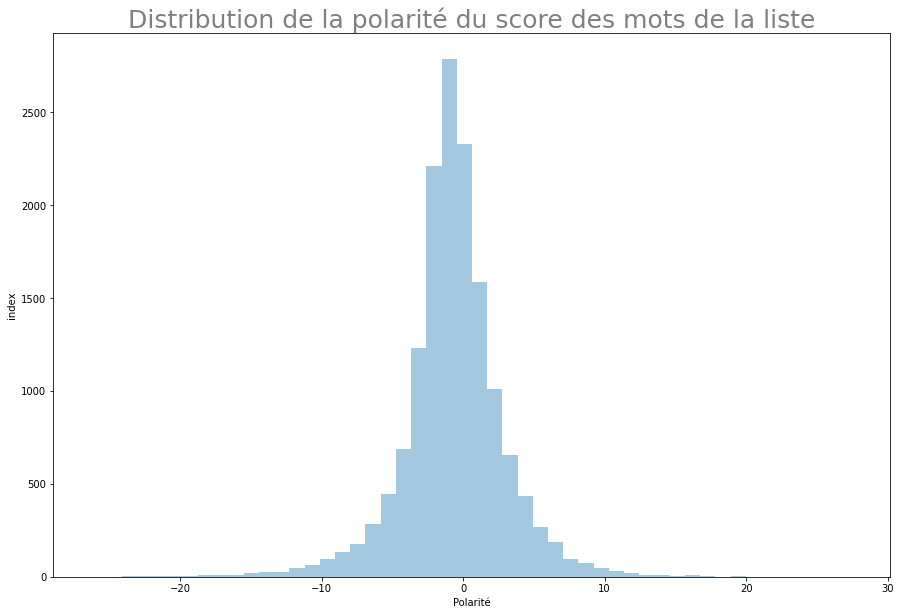

In [209]:
plt.figure(figsize=(15, 10))
dist = sns.distplot(df2.score, kde=False)
dist.set_xlabel("Polarité")
dist.set_ylabel("index")
plt.title('Distribution de la polarité du score des mots de la liste',size = 25, color='grey')

## avec une random forest

comme la fonction met trop de temps à s'executer on teste le calcul avec une Random Forest

In [140]:
vecteur={}
for i in range(100):
 vecteur["vec_%s"% str(i)] = []
print(vecteur['vec_0'])

[]


In [141]:
word_d=[]
score_d=[]

In [144]:
for i in range(4000):
  mot_d=df2.word[i]
  word_d.append(mot_d)
  score_d.append(int(df2.score[i]))
  for i in range(100):
    vecteur["vec_%s"% str(i)].append(embedding_dict[mot_d][i])

In [145]:
# Verification
print(len(word_d))
print(len(vecteur['vec_10']))
print(len(vecteur['vec_0']))

4000
4000
4000


In [147]:
data_d={'word':  word_d, 'score': score_d}
for i in range(100):
  data_d["vec_%s"% str(i)]=vecteur["vec_%s"% str(i)]
train_d = pd.DataFrame (data_d)
# train_d = train_d.sort_values(by = 'word')
print(train_d)

           word  score     vec_0  ...    vec_97    vec_98   vec_99
0             i      6 -0.046539  ... -0.376160 -0.032502  0.80620
1           eat      2 -0.794350  ... -0.323350  0.698980  0.26452
2          food      0 -0.164860  ... -0.067904  1.507200  0.60889
3         thats      0  0.197900  ... -0.271500 -0.616550  0.67307
4            im     -2  0.417110  ... -0.294440 -0.039114  0.39534
...         ...    ...       ...  ...       ...       ...      ...
3995   argument     -1  0.228510  ... -0.148570  0.567130  0.97960
3996        bod      0  0.161920  ... -0.216530 -0.277120  0.14191
3997     solved     -3 -0.143480  ... -0.334170  0.105990 -0.12502
3998  admitting     -6  0.867620  ...  0.390640 -0.021307  0.10499
3999    teacher      3  0.443740  ... -0.665220 -0.100120 -0.17729

[4000 rows x 102 columns]


In [148]:
# output donc consultable sur le drive
train_d.to_csv('/content/drive/My Drive/kaggle/data_vec_positivity.csv', index=False)

le train est bien correct

maintenant on prépare le test

In [150]:
vecteur_f={}
for i in range(100):
 vecteur_f["vec_%s"% str(i)] = []
print(vecteur_f["vec_15"])

[]


In [151]:
corpus_rf=[]
for word in corpus_set:
  if (word not in List_Positive_Words or word not in List_Negative_Words):
    corpus_rf.append(word)

In [152]:
word_f=[]
for word in corpus_rf:
  word_f.append(word)
  for i in range(100):
    vecteur_f["vec_%s"% str(i)].append(embedding_dict[word][i])

In [153]:
data_f={'word':  word_f}
for i in range(100):
  data_f["vec_%s"% str(i)]=vecteur_f["vec_%s"% str(i)]
test_f = pd.DataFrame (data_f)
# test_f =test_f.sort_values(by = 'word')
print(test_f)

             word     vec_0     vec_1  ...    vec_97    vec_98   vec_99
0               i -0.046539  0.619660  ... -0.376160 -0.032502  0.80620
1            like -0.268700  0.817080  ... -0.401100  0.746570  0.31122
2             eat -0.794350  0.732210  ... -0.323350  0.698980  0.26452
3       delicious -0.655340  0.340340  ... -0.688530  0.089564  0.72300
4            food -0.164860  0.919970  ... -0.067904  1.507200  0.60889
...           ...       ...       ...  ...       ...       ...      ...
17410  predefined -0.623740  0.008601  ... -0.266930 -0.337900  0.65559
17411      luxury  0.044913 -0.025096  ... -0.229930  2.082600 -0.20064
17412       flats  0.234120  0.258010  ... -0.166650  0.280700 -0.23462
17413  rigorously -0.566620  0.038456  ... -0.257400 -0.408960  0.45789
17414   reachable -0.998720 -0.081571  ...  0.112860 -0.045551 -0.10090

[17415 rows x 101 columns]


In [154]:
features=[]
for i in range(100):
  features.append("vec_%s"% str(i))

In [157]:
y = train_d['score']

X = pd.get_dummies(train_d[features])
X_test = pd.get_dummies(test_f[features])

model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=1) 
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'word': test_f.word, 'score': predictions})

print(output)

             word  score
0               i      6
1            like      0
2             eat      2
3       delicious      0
4            food      0
...           ...    ...
17410  predefined      0
17411      luxury      0
17412       flats      0
17413  rigorously      0
17414   reachable      0

[17415 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution de la polarité des mots (calculé par une random forest)')

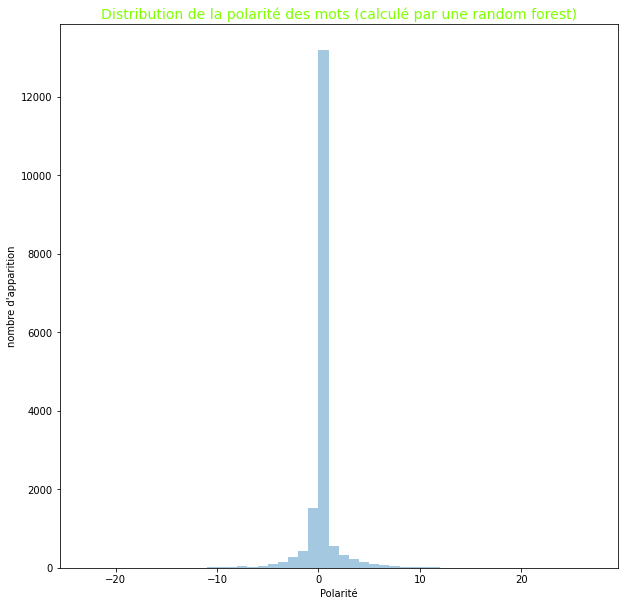

In [158]:
plt.figure(figsize=(10, 10))
dist = sns.distplot(output.score, kde=False)
dist.set_xlabel("Polarité")
dist.set_ylabel("nombre d'apparition")
plt.title('Distribution de la polarité des mots (calculé par une random forest)',size = 14, color='chartreuse')

La random forest est plus efficace, on calcule beaucoup plus vite

#**SCORE D'UN REVIEWS** :

Tri data :

In [159]:
data_test_polarity=data_reviews_light.copy()
data_test_polarity=data_test_polarity.drop(['Sentiment_Polarity'], axis=1)
data_test_polarity.head()

Translated_Review
0  I like eat delicious food Thats Im cooking foo...
1    This help eating healthy exercise regular basis
3         Works great especially going grocery store
4                                       Best idea us
5                                           Best way

##Methode 1

très longue

In [160]:
def score(review):
  Tableau=[]
  Tableau=review.split()
  scoreP=0
  scoreN=0
  scoreA=0
  Nb_mots_non_liste=0
  for i in range(len(Tableau)):
    print(Tableau[i])
    Tableau[i]= Tableau[i].lower() # on met le mot en minuscule
    
    if (is_in_positive_List(Tableau[i])): 
      scoreP=scoreP+1 #si la review contient un mot positif le scoreP s'incrémente

    elif (is_in_negative_List(Tableau[i])):
      scoreN=scoreN-1 #si la review contient un mot positif le scoreN s'incrémente
    
    else:
      scoreA=scoreA+score_one_word(Tableau[i])
      Nb_mots_non_liste=Nb_mots_non_liste+1

      scoreA=scoreA/Nb_mots_non_liste
      scoreA=scoreA/100
      

  return (scoreP,scoreN,scoreA)

In [161]:
score("hello les animaux")
# Exemple

hello
les
animaux


(0, 0, -0.2540823391545756)

In [162]:
score(data_reviews_light['Translated_Review'][5])

Best
way


(1, 0, 0.75478557119146)

##methode 2

Methode 2 Neutral score:
pas trop retenu car peu de sens

In [163]:
def score_neutral(review):
  Tableau=[]
  Tableau=review.split()
  scoreP=0
  scoreN=0
  scoreA=0
  ScoreT=0
  Nb_mots_non_liste=0
  for i in range(len(Tableau)):
    Tableau[i]= Tableau[i].lower() 
    # print(Tableau[i])
    
    for word in embedding_dict:
      if (word==Tableau[i]):
        if (is_in_positive_List(Tableau[i])): 
         scoreP=scoreP+1 #si la review contient un mot positif le scoreP s'incrémente

        elif (is_in_negative_List(Tableau[i])):
         scoreN=scoreN-1 #si la review contient un mot positif le scoreN s'incrémente
    
        else:
         scoreA=scoreA+score_one_word(Tableau[i])
         scoreA=scoreA/100
         scoreA=0 

  ScoreT=(scoreP+scoreN+scoreA)/len(Tableau)

  return (ScoreT)

##methode 3

Methode 3 : en utilisant le corpus et la new_liste avec les scores

In [164]:
def score_best_method(review):
  Tableau=[]
  Tableau=review.split()
  scoreP=0
  scoreW=0
  Nb_words=0
  for w in Tableau:
    w= w.lower() 
    
    if (w in corpus_set):
      i=corpus_set.index(w)
      scoreW=df["score"][i]
      
      if (scoreW==1 or scoreW==-1):
        scoreW=scoreW*2
        Nb_words=Nb_words+2
      else:
        Nb_words=Nb_words+1
      
      
      scoreP= (scoreP+scoreW)/Nb_words
      

  # ScoreT=(scoreP+scoreN+scoreA)/len(Tableau)

  return (scoreP)

In [165]:
score_best_method(data_reviews_light['Translated_Review'][3])

0.019443023269194077

##Utilisation de la méthode 3

On calcule le score de chaque reviews en s'appuyant des mots qui la composent

In [166]:
data_score_review=[]
i=0
for review in data_test_polarity.Translated_Review:
  # print(review)
  data_score_review.append(score_best_method(review))
  i=i+1
  # if (i==5):
    # break
print(data_score_review)

[0.0013038548235165788, 0.004381178954697493, 0.019443023269194077, 0.06329578371330476, 0.20401066006161273, 0.24301278337836266, 0.014942387573731444, 0.006841319337664615, 0.17380334898829458, 0.0018971031747028121, 0.0031646140845273465, 0.005986403663112337, 0.002515345789427455, 0.0008871854329204542, -0.0016121390330254915, -0.0013197915473056323, 0.0804757719921569, 0.332415740545839, 0.1683132108479428, 0.04674200345296413, 0.007757029609100539, 0.09861697918580226, 0.003385029676887724, 0.08312178241244207, 0.18952870864421129, 0.0880275391678636, 0.009061981281265615, 0.2963389546051621, -0.0034702566645933228, -0.007629107297178254, 0.14921886621353528, 0.11307958900928496, 0.10210983095418973, 0.3741837611049414, 0.0005697050059436514, 0.11129490395697451, 0.17271037277144688, 0.2963389546051621, 0.1644228450829784, 0.11186328752897678, 0.005195677882205106, 0.006783477972358067, 0.0001246388649051486, 0.056740534912501014, 0.011476026375623722, 0.001019108580811123, 0.032

In [167]:
print(len(data_test_polarity.Translated_Review))

37427


## Visualisation polarité

In [169]:
data_reviews['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [170]:
fig = px.scatter(x=data_reviews.index, y=data_reviews['Sentiment_Polarity'])
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution de la polarité')

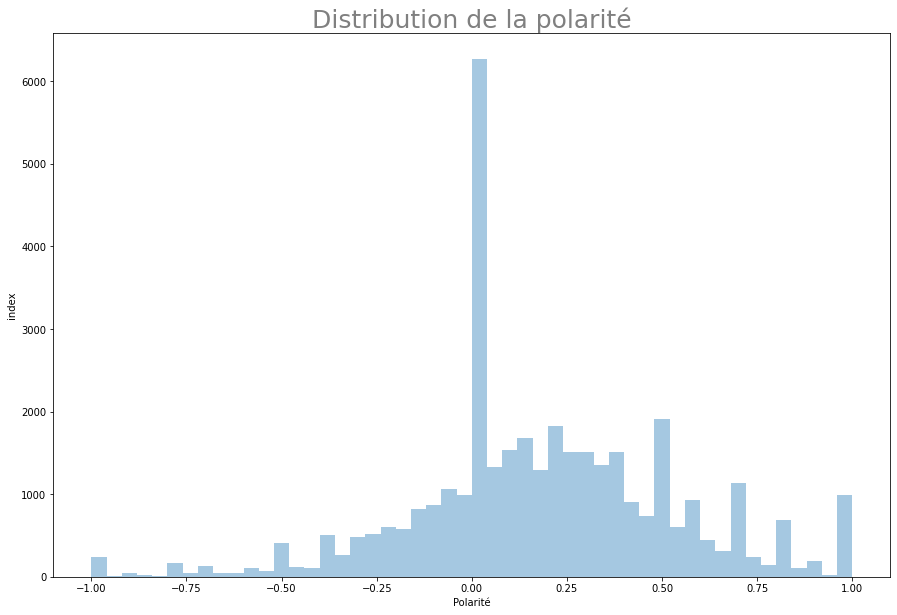

In [171]:
# la polarité des commentaires de la data 
plt.figure(figsize=(15, 10))
dist = sns.distplot(a=data_reviews['Sentiment_Polarity'], kde=False)
dist.set_xlabel("Polarité")
dist.set_ylabel("index")
plt.title('Distribution de la polarité',size = 25, color='grey')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution de la polarité')

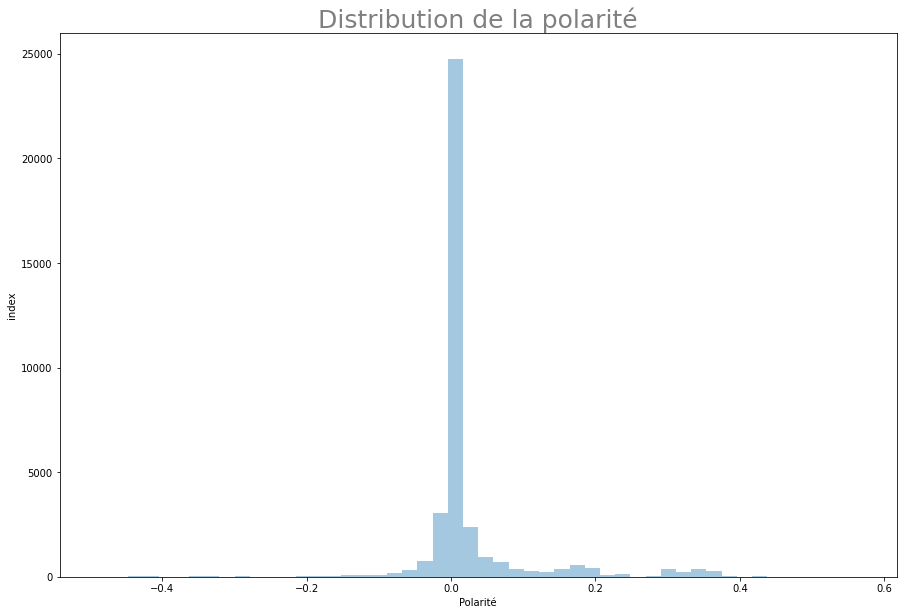

In [172]:
# la polarité des commentaires de la data qu'on a predit
plt.figure(figsize=(15, 10))
dist = sns.distplot(a=data_score_review, kde=False)
dist.set_xlabel("Polarité")
dist.set_ylabel("index")
plt.title('Distribution de la polarité',size = 25, color='grey')

#**NUAGES DE TAGS**

##Création des textes "mots des titres" par Catégorie

In [173]:
titres_applis=[]
titres_applis = data_reviews['App'].unique()
print(titres_applis)
print(len(titres_applis))

['10 Best Foods for You' '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st' ...
 'Hotwire Hotel & Car Rental App' 'Housing-Real Estate & Property'
 'Houzz Interior Design Ideas']
1074


In [177]:
liste_titres={}
for cat in category:
    liste_titres["liste_%s"% str(cat)] = ['hey','h']
print (liste_titres['liste_ART_AND_DESIGN'])
print (liste_titres)

['hey', 'h']
{'liste_ART_AND_DESIGN': ['hey', 'h'], 'liste_AUTO_AND_VEHICLES': ['hey', 'h'], 'liste_BEAUTY': ['hey', 'h'], 'liste_BOOKS_AND_REFERENCE': ['hey', 'h'], 'liste_BUSINESS': ['hey', 'h'], 'liste_COMICS': ['hey', 'h'], 'liste_COMMUNICATION': ['hey', 'h'], 'liste_DATING': ['hey', 'h'], 'liste_EDUCATION': ['hey', 'h'], 'liste_ENTERTAINMENT': ['hey', 'h'], 'liste_EVENTS': ['hey', 'h'], 'liste_FINANCE': ['hey', 'h'], 'liste_FOOD_AND_DRINK': ['hey', 'h'], 'liste_HEALTH_AND_FITNESS': ['hey', 'h'], 'liste_HOUSE_AND_HOME': ['hey', 'h'], 'liste_LIBRARIES_AND_DEMO': ['hey', 'h'], 'liste_LIFESTYLE': ['hey', 'h'], 'liste_GAME': ['hey', 'h'], 'liste_FAMILY': ['hey', 'h'], 'liste_MEDICAL': ['hey', 'h'], 'liste_SOCIAL': ['hey', 'h'], 'liste_SHOPPING': ['hey', 'h'], 'liste_PHOTOGRAPHY': ['hey', 'h'], 'liste_SPORTS': ['hey', 'h'], 'liste_TRAVEL_AND_LOCAL': ['hey', 'h'], 'liste_TOOLS': ['hey', 'h'], 'liste_PERSONALIZATION': ['hey', 'h'], 'liste_PRODUCTIVITY': ['hey', 'h'], 'liste_PARENTING': ['

In [178]:
liste_titres={}
for cat in category:
  liste_mots_titre=[]
  for i in data.index:
    if data['Category'][i]==cat:
      title=data["App"][i]
      title=title.lower()
      title=title.split()
      for i in range(len(title)):
        word=title[i]
        liste_mots_titre.append(word)
  StrA = " ".join(liste_mots_titre)
  
    # if name not in liste_titres:
      # liste_titres.append(name.split())
  # data_titres_tries.cat[i]=[liste_titres]
  # data_titres_tries[i] = liste_titres
  liste_titres["liste_%s"% str(cat)] = StrA 

In [179]:
liste_titres['liste_ART_AND_DESIGN']

"photo editor & candy camera & grid & scrapbook coloring book moana u launcher lite – free live cool themes, hide apps sketch - draw & paint pixel draw - number art coloring book paper flowers instructions smoke effect photo maker - smoke editor infinite painter garden coloring book kids paint free - drawing fun text on photo - fonteee name art photo editor - focus n filters tattoo name on my photo editor mandala coloring book 3d color pixel by number - sandbox art coloring learn to draw kawaii characters photo designer - write your name with shapes 350 diy room decor ideas flipaclip - cartoon animation ibis paint x logo maker - small business boys photo editor - six pack & men's suit superheroes wallpapers | 4k backgrounds mcqueen coloring pages hd mickey minnie wallpapers harley quinn wallpapers hd colorfit - drawing & coloring animated photo editor pencil sketch drawing easy realistic drawing tutorial pink silver bow keyboard theme art drawing ideas anime manga coloring book easy or

##Dessins Nuages de tags

In [180]:
# import
from PIL import Image

wc={}
for cat in category:
  a = '/content/drive/My Drive/kaggle/playstore/images/%s'% str(cat)
  b = '/content/drive/My Drive/kaggle/playstore/images/Tags/%s'% str(cat)
  image = np.array(Image.open(a + '.png'))
  wc["liste_%s"% str(cat)]=WordCloud(background_color="black", mask=image, contour_width=1, contour_color='white')
  wc["liste_%s"% str(cat)].generate(liste_titres["liste_%s"% str(cat)])
  wc["liste_%s"% str(cat)].to_file(b + '.png')

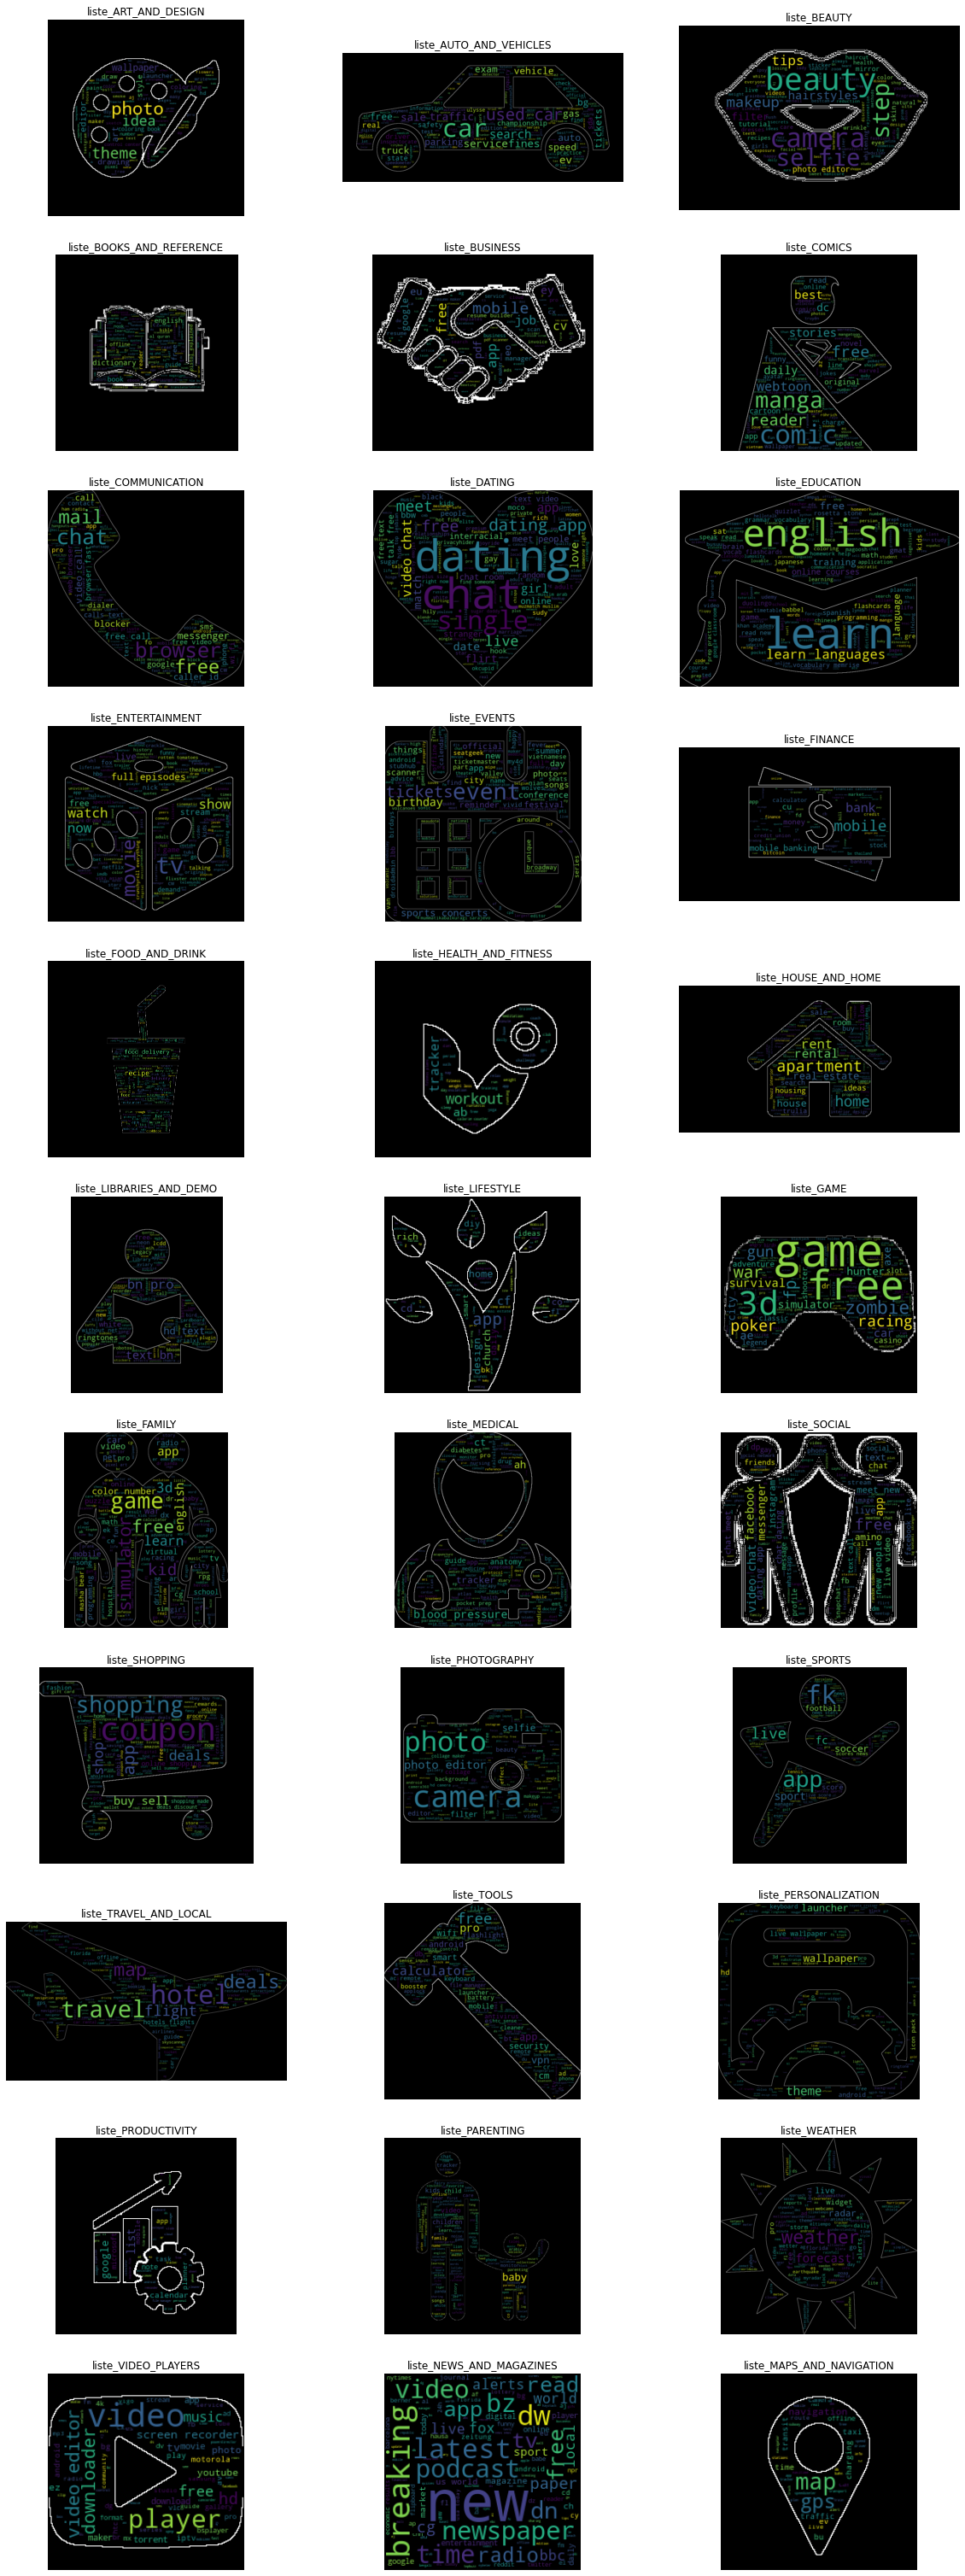

In [181]:
plt.figure(figsize=(20,60))
i=0
for l in liste_titres:
  i=i+1
  plt.subplot(12,3,i)
  plt.imshow(wc[l], interpolation='bilinear')
  plt.title(l)
  plt.axis("off")

# **Prédiction de la catégorie**

In [184]:
# On recupere les mots de chaque titre
all_words_titres=[]
for h in liste_titres:
  liste=liste_titres[h].translate(str.maketrans('', '', string.punctuation))
  liste=liste.lower()
  liste=liste.split()
  for word in liste:
    if word not in all_words_titres:
      all_words_titres.append(word)

print(all_words_titres)

['photo', 'editor', 'candy', 'camera', 'grid', 'scrapbook', 'coloring', 'book', 'moana', 'u', 'launcher', 'lite', '–', 'free', 'live', 'cool', 'themes', 'hide', 'apps', 'sketch', 'draw', 'paint', 'pixel', 'number', 'art', 'paper', 'flowers', 'instructions', 'smoke', 'effect', 'maker', 'infinite', 'painter', 'garden', 'kids', 'drawing', 'fun', 'text', 'on', 'fonteee', 'name', 'focus', 'n', 'filters', 'tattoo', 'my', 'mandala', '3d', 'color', 'by', 'sandbox', 'learn', 'to', 'kawaii', 'characters', 'designer', 'write', 'your', 'with', 'shapes', '350', 'diy', 'room', 'decor', 'ideas', 'flipaclip', 'cartoon', 'animation', 'ibis', 'x', 'logo', 'small', 'business', 'boys', 'six', 'pack', 'mens', 'suit', 'superheroes', 'wallpapers', '4k', 'backgrounds', 'mcqueen', 'pages', 'hd', 'mickey', 'minnie', 'harley', 'quinn', 'colorfit', 'animated', 'pencil', 'easy', 'realistic', 'tutorial', 'pink', 'silver', 'bow', 'keyboard', 'theme', 'anime', 'manga', 'origami', 'i', 'creative', 'idea', 'how', 'lady

In [185]:
# dictionnaire des frequences
fq={}
for cat in category:
  fq[cat]=[]

In [186]:
l=['bonjour', 'je', 'mappelle', 'simon']
m=Counter(l)
print(m)

Counter({'bonjour': 1, 'je': 1, 'mappelle': 1, 'simon': 1})


In [187]:
liste_titres["liste_GAME"]

"roblox subway surfers candy crush saga solitaire bubble shooter hello kitty nail salon slither.io clash royale temple run 2 pou helix jump block puzzle angry birds rio plants vs. zombies free sonic dash candy crush soda saga zombie hunter king clash of clans kick the buddy block puzzle classic legend ! pac-man super jim jump - pixel 3d 8 ball pool magic tiles 3 bubble witch 3 saga word search granny angry birds classic flow free race the traffic moto fishdom galaxy attack: alien shooter zombie tsunami bubble shooter 2 barbie™ fashion closet candy crush jelly saga hill climb racing gardenscapes marble - temple quest shooting king zombie catchers minion rush: despicable me official game farm heroes saga geometry dash world my talking angela cut the rope full free sniper 3d gun shooter: free shooting games - fps subway surfers roblox pou 8 ball pool clash of clans candy crush saga plants vs. zombies free cooking fever toon blast score! hero my talking angela bubble shooter toy blast mira

In [188]:
for cat in category:
  # on enleve la ponctuation
  liste_titres["liste_%s"% str(cat)]=liste_titres["liste_%s"% str(cat)].translate(str.maketrans('', '', string.punctuation))
  # tout en minuscule 
  liste_titres["liste_%s"% str(cat)]=liste_titres["liste_%s"% str(cat)].lower()
  liste_titres["liste_%s"% str(cat)]=liste_titres["liste_%s"% str(cat)].split()

In [189]:
for cat in category:
  m=Counter(liste_titres["liste_%s"% str(cat)])
  for word in all_words_titres:
    if word in m:
      fq[cat].append(1-1/m[word]) #normalisation
    else: fq[cat].append(0)

In [190]:
len(fq['LIFESTYLE'])

9455

In [191]:
len(all_words_titres)

9455

In [192]:
data_t={'mot': all_words_titres}
for cat in category:
  data_t[cat]=fq[cat]

In [193]:
data_fréquence = pd.DataFrame (data_t)
data_fréquence = data_fréquence.sort_values(by = 'mot')
data_fréquence.to_csv('/content/drive/My Drive/kaggle/data_fréquence.csv', index=False)

In [194]:
data_fréquence.head()

mot  ART_AND_DESIGN  ...  NEWS_AND_MAGAZINES  MAPS_AND_NAVIGATION
186      02             0.0  ...                 0.0                  0.0
9207  058ba             0.0  ...                 0.0                  0.0
678       1             0.0  ...                 0.0                  0.0
1822     10             0.0  ...                 0.0                  0.0
5187    100             0.0  ...                 0.0                  0.0

[5 rows x 34 columns]

In [195]:
# creation du train pour la random forest
category_word=[]
word=[]
ma_cat=''
for i in data_fréquence.index:
  if data_fréquence.mot[i] in embedding_dict:
    word.append(data_fréquence.mot[i])
    score=0
    for cat in category:
      valeur=data_fréquence["%s"% str(cat)][i]
      if (score < valeur):
        score=valeur
        ma_cat=cat
    category_word.append(ma_cat)

In [196]:
data_last_one={'word' : word ,'Best_Category': category_word}

In [197]:
vecteur_last_one={}
for i in range(100):
 vecteur_last_one["vec_%s"% str(i)] = []

In [198]:
for w in word:
  for i in range(100):
    vecteur_last_one["vec_%s"% str(i)].append(embedding_dict[w][i])

In [199]:
for i in range(100):
 data_last_one["vec_%s"% str(i)] = vecteur_last_one["vec_%s"% str(i)]

In [200]:
data_category = pd.DataFrame (data_last_one)

In [201]:
data_category.head()
data_category.to_csv('/content/drive/My Drive/kaggle/data_category.csv', index=False)

In [202]:
def creation_df(liste):
  liste=liste.lower()
  liste=liste.split()
  
  words_list_in_dict=[]

  vecteurs={}
  for i in range(100):
    vecteurs["vec_%s"% str(i)] = []

  for w in liste:
    if w in embedding_dict:
      words_list_in_dict.append(w)
      for i in range(100):
        vecteurs["vec_%s"% str(i)].append(embedding_dict[w][i])

  data_p={'word': words_list_in_dict}
  for i in range(100):
    data_p["vec_%s"% str(i)]=vecteurs["vec_%s"% str(i)]

  data_predict = pd.DataFrame (data_p)
  return data_predict

In [203]:
# test 
creation_df('good morning')

word     vec_0    vec_1     vec_2  ...   vec_96    vec_97   vec_98   vec_99
0     good -0.030769  0.11993  0.539090  ... -0.26573 -0.528780  0.17584  1.06500
1  morning -0.210040 -0.39664  0.009014  ...  0.22541  0.064547  0.47000  0.59993

[2 rows x 101 columns]

In [204]:
def predict_category(titre):
   
  data_predict = creation_df(titre)

  y = data_category['Best_Category']

  features=[]
  for i in range(100):
    features.append("vec_%s"% str(i))

  X = pd.get_dummies(data_category[features])
  X_test = pd.get_dummies(data_predict[features])

  model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=1) #à voir avec LIna
  model.fit(X, y)
  predictions = model.predict(X_test)

  output = pd.DataFrame({'word': data_predict.word, 'Best_Category': predictions})

  print(output)

In [205]:
predict_category('project manager')

      word Best_Category
0  project        FAMILY
1  manager         TOOLS


___


Notebook réalisé dans le cadre de l'UE LIFPROJET, par Judith MILLET, Simon KLOPFENSTEIN et Lina ISMAIL.

___
